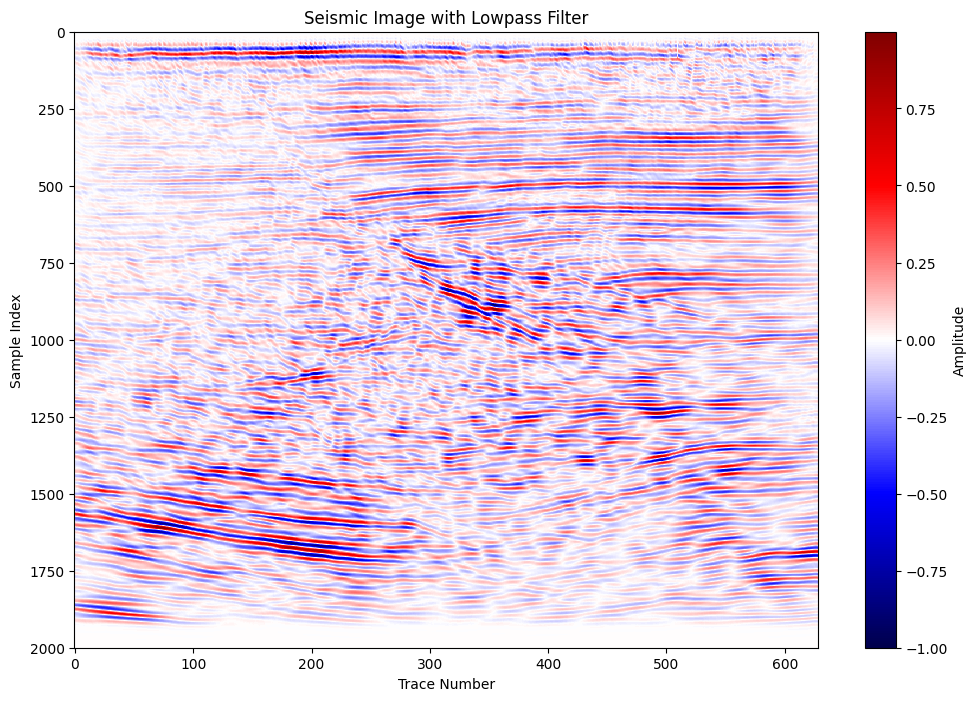

In [1]:
import segyio
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Function to apply a lowpass filter
def lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Open the SEG-Y file with ignore_geometry=True
with segyio.open('first.sgy', "r", ignore_geometry=True) as f:
    # Initialize an array to hold the seismic data
    num_traces = len(f.trace)
    num_samples = len(f.trace[0])
    seismic_data = np.zeros((num_traces, num_samples))
    
    # Iterate over all traces and store them in the array
    for i, trace in enumerate(f.trace):
        seismic_data[i, :] = trace
    
    # Apply lowpass filter to each trace
    fs = 1000  # Sample rate in Hz (adjust as needed)
    cutoff = 50  # Desired cutoff frequency of the filter in Hz
    for i in range(num_traces):
        seismic_data[i, :] = lowpass_filter(seismic_data[i, :], cutoff, fs)
    
    # Normalize the seismic data for better visualization
    seismic_data /= np.max(np.abs(seismic_data))
    
    # Plot the seismic image
    plt.figure(figsize=(12, 8))
    plt.imshow(seismic_data.T, aspect='auto', cmap='seismic', interpolation='none')
    plt.colorbar(label='Amplitude')
    plt.xlabel('Trace Number')
    plt.ylabel('Sample Index')
    plt.title('Seismic Image with Lowpass Filter')
    plt.show()
